In [30]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

/Users/michael/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [62]:
import glob
import pandas as pd
import simplejson as json

files = glob.glob('../results/run3/*.json')
def read_json(file):
    with open(file) as fh:
        return json.load(fh)
json_data = [read_json(f) for f in files]
df = pd.DataFrame(json_data).rename(columns={'command': 'program'})
df['size'] = df['file'].str.split('.').apply(lambda x: int(x[1]))

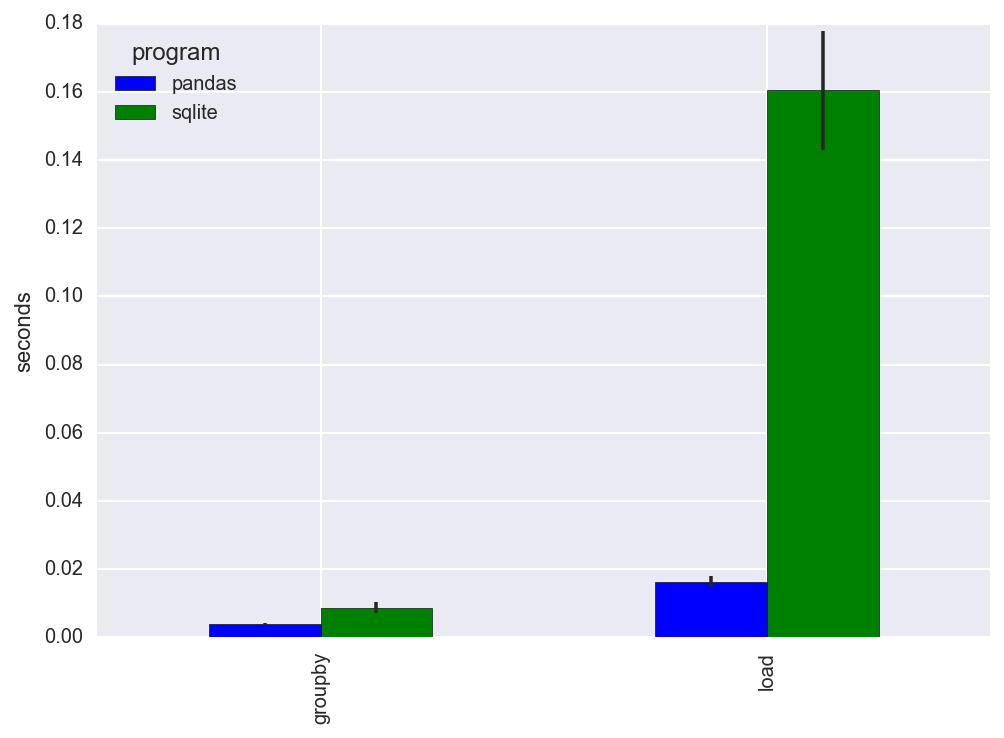

In [66]:
group = df.groupby(['size', 'program'])[['groupby', 'load']]
m = group.mean().loc[10000].T
s = group.std().loc[10000].T
ax = m.plot(kind='bar', yerr=s)
ax.set_ylabel("seconds")